# Critical outcome categorized Analysis NEW

## Loading Libraries

In [1]:
import pandas as pd
import os
import time
import random
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tabulate import tabulate

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100)

confidence_interval = 95
random_seed=0




2025-04-11 14:34:15.257693: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-11 14:34:15.266208: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-11 14:34:15.275747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-11 14:34:15.278874: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-11 14:34:15.286160: I tensorflow/core/platform/cpu_feature_guar

## All Variables Classification

In [28]:
df_master = pd.read_csv('df_master_ready_critical.csv')

In [29]:
from sklearn.preprocessing import LabelEncoder

# Fit and transform to get encoded values
encoder = LabelEncoder()
df_master['arrival_transport_encoded'] = encoder.fit_transform(df_master['arrival_transport'])

In [52]:
sum(df_master['outcome_critical']==1)

28170

/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-16 16:01:00.779000: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instea


🔹 Gradient Boosting Performance (Train Set) 🔹
✅ Accuracy: 0.8057 ± 0.0063
✅ AUC-ROC: 0.8972 ± 0.0006
✅ AUC-PR: 0.4786 ± 0.0021

🔹 Gradient Boosting Performance (Validation Set) 🔹
✅ Accuracy: 0.8078 ± 0.0218
✅ AUC-ROC: 0.8953 ± 0.0034
✅ AUC-PR: 0.4695 ± 0.0117
✅ Sensitivity: 0.8249 ± 0.0157
✅ Specificity: 0.8066 ± 0.0244

🔹 Random Forest Performance (Train Set) 🔹
✅ Accuracy: 0.9973 ± 0.0004
✅ AUC-ROC: 0.9998 ± 0.0000
✅ AUC-PR: 0.9950 ± 0.0004

🔹 Random Forest Performance (Validation Set) 🔹
✅ Accuracy: 0.8136 ± 0.0297
✅ AUC-ROC: 0.8902 ± 0.0024
✅ AUC-PR: 0.4556 ± 0.0058
✅ Sensitivity: 0.8081 ± 0.0349
✅ Specificity: 0.8139 ± 0.0342

🔹 Logistic Regression Performance (Train Set) 🔹
✅ Accuracy: 0.7717 ± 0.0103
✅ AUC-ROC: 0.8736 ± 0.0009
✅ AUC-PR: 0.3913 ± 0.0027

🔹 Logistic Regression Performance (Validation Set) 🔹
✅ Accuracy: 0.7669 ± 0.0176
✅ AUC-ROC: 0.8729 ± 0.0035
✅ AUC-PR: 0.3898 ± 0.0109
✅ Sensitivity: 0.8259 ± 0.0273
✅ Specificity: 0.7627 ± 0.0208

🔹 Neural Network Performance (Trai

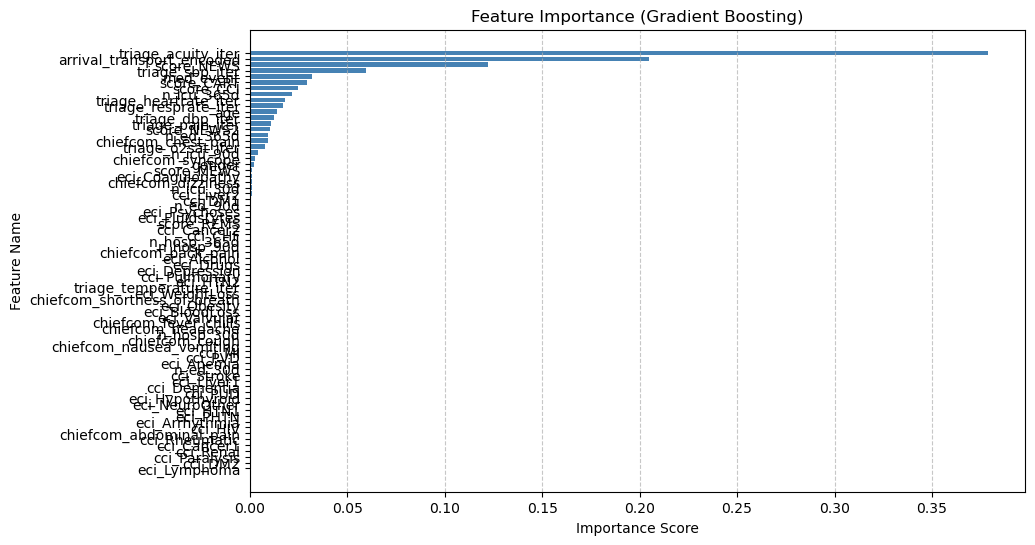


🔹 Feature Importances (Gradient Boosting):
                         Feature  Gradient Boosting Importance
19            triage_acuity_iter                      0.378825
20     arrival_transport_encoded                      0.205000
69                    score_NEWS                      0.122326
16               triage_sbp_iter                      0.059727
2                      med_event                      0.031654
67                    score_CART                      0.029340
66                     score_CCI                      0.024624
11                    n_icu_365d                      0.021436
13         triage_heartrate_iter                      0.018074
14          triage_resprate_iter                      0.017102
0                            age                      0.013752
17               triage_dbp_iter                      0.012262
18              triage_pain_iter                      0.010820
70                   score_NEWS2                      0.010057
5          

In [31]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bars
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder

# Define the feature set
variable = ["age", "gender", 'med_event', "n_ed_30d", "n_ed_90d", "n_ed_365d", "n_hosp_30d", "n_hosp_90d", 
            "n_hosp_365d", "n_icu_30d", "n_icu_90d", "n_icu_365d", "triage_temperature_iter", "triage_heartrate_iter", 
            "triage_resprate_iter", "triage_o2sat_iter", "triage_sbp_iter", "triage_dbp_iter", "triage_pain_iter", 
            "triage_acuity_iter", 'arrival_transport_encoded', "chiefcom_chest_pain", "chiefcom_abdominal_pain", 
            "chiefcom_headache", "chiefcom_shortness_of_breath", "chiefcom_back_pain", "chiefcom_cough", 
            "chiefcom_nausea_vomiting", "chiefcom_fever_chills", "chiefcom_syncope", "chiefcom_dizziness", "cci_MI", 
            "cci_CHF", "cci_PVD", "cci_Stroke", "cci_Dementia", "cci_Pulmonary", "cci_Rheumatic", "cci_PUD", 
            "cci_Liver1", "cci_DM1", "cci_DM2", "cci_Paralysis", "cci_Renal", "cci_Cancer1", "cci_Liver2", 
            "cci_Cancer2", "cci_HIV", "eci_Arrhythmia", "eci_Valvular", "eci_PHTN", "eci_HTN1", "eci_HTN2", 
            "eci_NeuroOther", "eci_Hypothyroid", "eci_Lymphoma", "eci_Coagulopathy", "eci_Obesity", "eci_WeightLoss", 
            "eci_FluidsLytes", "eci_BloodLoss", "eci_Anemia", "eci_Alcohol", "eci_Drugs","eci_Psychoses", "eci_Depression",
            "score_CCI","score_CART","score_REMS","score_NEWS","score_NEWS2","score_MEWS"]


target = "outcome_critical"




# Split the dataset into training and testing sets
X = df_master[variable]
y = df_master[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers in a pipeline
models = {
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", LogisticRegression(max_iter=1000, random_state=42))
    ])
}

# Define Deep Learning Model Wrapper
def create_mlp():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auc')])
    return model

models["Neural Network"] = Pipeline([
    ("classifier", KerasClassifier(build_fn=create_mlp, epochs=20, batch_size=64, verbose=0))
])

# Store results
metrics = ["Accuracy", "AUC-ROC", "AUC-PR", "Sensitivity", "Specificity"]
train_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}
test_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}
feature_importances = {"Gradient Boosting": None, "Random Forest": None}

# Define a function to find the optimal threshold using Youden's index
def find_optimal_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Run Stratified 5-Fold Cross-Validation with threshold optimization
for model_name, pipeline in models.items():
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train the model on the training fold
        pipeline.fit(X_train_fold, y_train_fold)

        # Get predicted probabilities for training and validation sets
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_train_pred_prob = pipeline.predict_proba(X_train_fold)[:, 1]
            y_val_pred_prob = pipeline.predict_proba(X_val_fold)[:, 1]
        else:
            y_train_pred_prob = pipeline.predict(X_train_fold)
            y_val_pred_prob = pipeline.predict(X_val_fold)

        # Determine optimal thresholds using Youden's index for both training and validation folds
        optimal_threshold_train = find_optimal_threshold(y_train_fold, y_train_pred_prob)
        optimal_threshold_val = find_optimal_threshold(y_val_fold, y_val_pred_prob)

        # Compute binary predictions using the optimal thresholds
        y_train_pred_opt = (y_train_pred_prob >= optimal_threshold_train).astype(int)
        y_val_pred_opt = (y_val_pred_prob >= optimal_threshold_val).astype(int)

        # Compute train metrics (using optimal threshold predictions)
        train_results[model_name]["Accuracy"].append(accuracy_score(y_train_fold, y_train_pred_opt))
        train_results[model_name]["AUC-ROC"].append(roc_auc_score(y_train_fold, y_train_pred_prob))
        train_results[model_name]["AUC-PR"].append(average_precision_score(y_train_fold, y_train_pred_prob))
        
        # Compute sensitivity and specificity on the validation fold using the optimal threshold
        conf_matrix = confusion_matrix(y_train_fold, y_train_pred_opt)
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

        train_results[model_name]["Sensitivity"].append(sensitivity)
        train_results[model_name]["Specificity"].append(specificity)

        # Compute validation (test) metrics (using optimal threshold predictions)
        test_results[model_name]["Accuracy"].append(accuracy_score(y_val_fold, y_val_pred_opt))
        test_results[model_name]["AUC-ROC"].append(roc_auc_score(y_val_fold, y_val_pred_prob))
        test_results[model_name]["AUC-PR"].append(average_precision_score(y_val_fold, y_val_pred_prob))

        # Compute sensitivity and specificity on the validation fold using the optimal threshold
        conf_matrix = confusion_matrix(y_val_fold, y_val_pred_opt)
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

        test_results[model_name]["Sensitivity"].append(sensitivity)
        test_results[model_name]["Specificity"].append(specificity)

    # Store feature importances for tree-based models
    if hasattr(pipeline.named_steps["classifier"], "feature_importances_"):
        feature_importances[model_name] = pipeline.named_steps["classifier"].feature_importances_

# Compute Mean ± 2SD for Train and Validation Scores
for model_name in models.keys():
    print(f"\n🔹 {model_name} Performance (Train Set) 🔹")
    for metric in metrics[:3]:  # Accuracy, AUC-ROC, AUC-PR
        mean = np.mean(train_results[model_name][metric])
        std = np.std(train_results[model_name][metric])
        print(f"✅ {metric}: {mean:.4f} ± {2 * std:.4f}")

    print(f"\n🔹 {model_name} Performance (Validation Set) 🔹")
    for metric in metrics:
        mean = np.mean(test_results[model_name][metric])
        std = np.std(test_results[model_name][metric])
        print(f"✅ {metric}: {mean:.4f} ± {2 * std:.4f}")

# Store feature importances and plot them for tree-based models (GB)
if feature_importances["Gradient Boosting"] is not None:
    feature_importance_df = pd.DataFrame({
        "Feature": variable,
        "Gradient Boosting Importance": feature_importances["Gradient Boosting"]
    }).sort_values(by="Gradient Boosting Importance", ascending=False)

    # Plot Feature Importance for Gradient Boosting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Gradient Boosting Importance"], color='steelblue')
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.title("Feature Importance (Gradient Boosting)")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

    print("\n🔹 Feature Importances (Gradient Boosting):")
    print(feature_importance_df)


## Top 15 var's (Categorized)

In [2]:
df_master = pd.read_csv('df_critical_categorical_variables_15_3_Latest.csv')

In [3]:
from sklearn.preprocessing import LabelEncoder

# Fit and transform to get encoded values
encoder = LabelEncoder()
df_master['arrival_transport_encoded'] = encoder.fit_transform(df_master['arrival_transport'])

# see the classes
print("Classes found by LabelEncoder:", encoder.classes_)

Classes found by LabelEncoder: ['AMBULANCE' 'HELICOPTER' 'OTHER' 'UNKNOWN' 'WALK IN']


In [4]:
mapping = df_master[['arrival_transport', 'arrival_transport_encoded']].drop_duplicates()
print(mapping)

     arrival_transport  arrival_transport_encoded
0            AMBULANCE                          0
5              WALK IN                          4
22             UNKNOWN                          3
194              OTHER                          2
1400        HELICOPTER                          1


/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model 


🔹 Gradient Boosting Performance (Train Set) 🔹
✅ Accuracy: 0.7799 ± 0.0058
✅ AUC-ROC: 0.8881 ± 0.0017
✅ AUC-PR: 0.4492 ± 0.0052
✅ Sensitivity: 0.8373 ± 0.0065
✅ Specificity: 0.7758 ± 0.0067

🔹 Gradient Boosting Performance (Validation Set) 🔹
✅ Accuracy: 0.7821 ± 0.0206
✅ AUC-ROC: 0.8869 ± 0.0018
✅ AUC-PR: 0.4450 ± 0.0111
✅ Sensitivity: 0.8336 ± 0.0263
✅ Specificity: 0.7785 ± 0.0239

🔹 Random Forest Performance (Train Set) 🔹
✅ Accuracy: 0.9045 ± 0.0062
✅ AUC-ROC: 0.9796 ± 0.0003
✅ AUC-PR: 0.8490 ± 0.0013
✅ Sensitivity: 0.9357 ± 0.0089
✅ Specificity: 0.9023 ± 0.0072

🔹 Random Forest Performance (Validation Set) 🔹
✅ Accuracy: 0.7852 ± 0.0198
✅ AUC-ROC: 0.8357 ± 0.0040
✅ AUC-PR: 0.3618 ± 0.0091
✅ Sensitivity: 0.7554 ± 0.0268
✅ Specificity: 0.7873 ± 0.0230

🔹 Logistic Regression Performance (Train Set) 🔹
✅ Accuracy: 0.7696 ± 0.0025
✅ AUC-ROC: 0.8632 ± 0.0009
✅ AUC-PR: 0.3700 ± 0.0031
✅ Sensitivity: 0.7988 ± 0.0045
✅ Specificity: 0.7675 ± 0.0029

🔹 Logistic Regression Performance (Validation

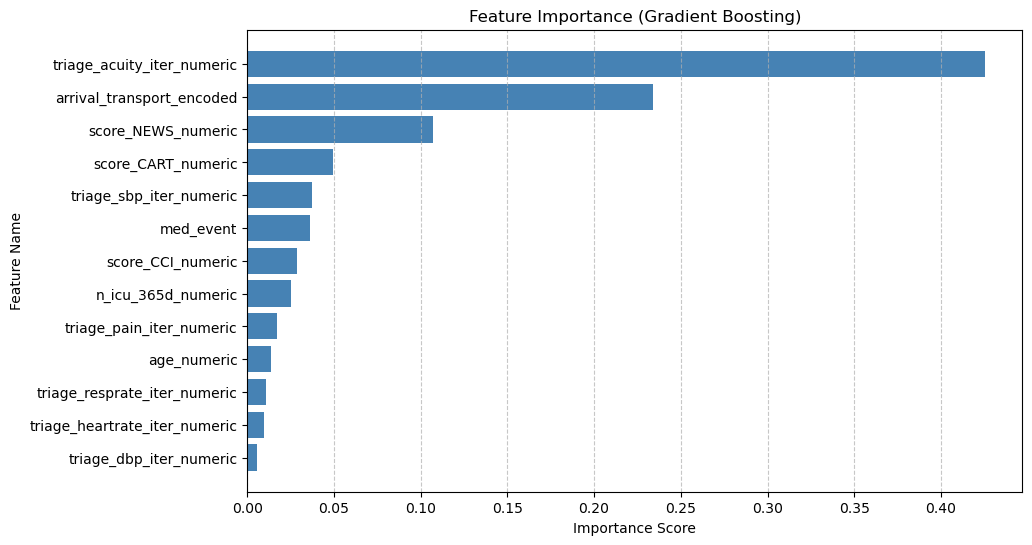


🔹 Feature Importances (Gradient Boosting):
                          Feature  Gradient Boosting Importance
0      triage_acuity_iter_numeric                      0.425607
1       arrival_transport_encoded                      0.234047
2              score_NEWS_numeric                      0.107378
5              score_CART_numeric                      0.049434
3         triage_sbp_iter_numeric                      0.037507
4                       med_event                      0.036316
6               score_CCI_numeric                      0.028523
7              n_icu_365d_numeric                      0.025179
12       triage_pain_iter_numeric                      0.017192
10                    age_numeric                      0.013417
9    triage_resprate_iter_numeric                      0.010545
8   triage_heartrate_iter_numeric                      0.009451
11        triage_dbp_iter_numeric                      0.005404


In [57]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bars
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve, precision_recall_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import LabelEncoder

# Define the feature set (top 13)
variable = [
    'triage_acuity_iter_numeric',
    'arrival_transport_encoded',
    'score_NEWS_numeric',
    'triage_sbp_iter_numeric',
    'med_event',
    'score_CART_numeric',
    'score_CCI_numeric',
    'n_icu_365d_numeric',
    'triage_heartrate_iter_numeric',
    'triage_resprate_iter_numeric',
    'age_numeric',
    'triage_dbp_iter_numeric',
    'triage_pain_iter_numeric',
    #'score_NEWS2_numeric',
    #'n_ed_365d_numeric'

]


target = "outcome_critical"




# Split the dataset into training and testing sets
X = df_master[variable]
y = df_master[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers in a pipeline
models = {
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", LogisticRegression(max_iter=1000, random_state=42))
    ])
}

# Define Deep Learning Model Wrapper
def create_mlp():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auc')])
    return model

models["Neural Network"] = Pipeline([
    ("classifier", KerasClassifier(build_fn=create_mlp, epochs=20, batch_size=64, verbose=0))
])

# Store results
metrics = ["Accuracy", "AUC-ROC", "AUC-PR", "Sensitivity", "Specificity"]
train_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}
test_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}
feature_importances = {"Gradient Boosting": None, "Random Forest": None}

# Define a function to find the optimal threshold using Youden's index
def find_optimal_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Run Stratified 5-Fold Cross-Validation with threshold optimization
for model_name, pipeline in models.items():
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        # Train the model on the training fold
        pipeline.fit(X_train_fold, y_train_fold)

        # Get predicted probabilities for training and validation sets
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_train_pred_prob = pipeline.predict_proba(X_train_fold)[:, 1]
            y_val_pred_prob = pipeline.predict_proba(X_val_fold)[:, 1]
        else:
            y_train_pred_prob = pipeline.predict(X_train_fold)
            y_val_pred_prob = pipeline.predict(X_val_fold)

        # Determine optimal thresholds using Youden's index for both training and validation folds
        optimal_threshold_train = find_optimal_threshold(y_train_fold, y_train_pred_prob)
        optimal_threshold_val = find_optimal_threshold(y_val_fold, y_val_pred_prob)

        # Compute binary predictions using the optimal thresholds
        y_train_pred_opt = (y_train_pred_prob >= optimal_threshold_train).astype(int)
        y_val_pred_opt = (y_val_pred_prob >= optimal_threshold_val).astype(int)

        # Compute train metrics (using optimal threshold predictions)
        train_results[model_name]["Accuracy"].append(accuracy_score(y_train_fold, y_train_pred_opt))
        train_results[model_name]["AUC-ROC"].append(roc_auc_score(y_train_fold, y_train_pred_prob))
        train_results[model_name]["AUC-PR"].append(average_precision_score(y_train_fold, y_train_pred_prob))
        
        # Compute sensitivity and specificity on the validation fold using the optimal threshold
        conf_matrix = confusion_matrix(y_train_fold, y_train_pred_opt)
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

        train_results[model_name]["Sensitivity"].append(sensitivity)
        train_results[model_name]["Specificity"].append(specificity)

        # Compute validation (test) metrics (using optimal threshold predictions)
        test_results[model_name]["Accuracy"].append(accuracy_score(y_val_fold, y_val_pred_opt))
        test_results[model_name]["AUC-ROC"].append(roc_auc_score(y_val_fold, y_val_pred_prob))
        test_results[model_name]["AUC-PR"].append(average_precision_score(y_val_fold, y_val_pred_prob))

        # Compute sensitivity and specificity on the validation fold using the optimal threshold
        conf_matrix = confusion_matrix(y_val_fold, y_val_pred_opt)
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0

        test_results[model_name]["Sensitivity"].append(sensitivity)
        test_results[model_name]["Specificity"].append(specificity)

    # Store feature importances for tree-based models
    if hasattr(pipeline.named_steps["classifier"], "feature_importances_"):
        feature_importances[model_name] = pipeline.named_steps["classifier"].feature_importances_

# Compute Mean ± 2SD for Train and Validation Scores
for model_name in models.keys():
    print(f"\n🔹 {model_name} Performance (Train Set) 🔹")
    for metric in metrics:  # Accuracy, AUC-ROC, AUC-PR
        mean = np.mean(train_results[model_name][metric])
        std = np.std(train_results[model_name][metric])
        print(f"✅ {metric}: {mean:.4f} ± {2 * std:.4f}")

    print(f"\n🔹 {model_name} Performance (Validation Set) 🔹")
    for metric in metrics:
        mean = np.mean(test_results[model_name][metric])
        std = np.std(test_results[model_name][metric])
        print(f"✅ {metric}: {mean:.4f} ± {2 * std:.4f}")

# Store feature importances and plot them for GB
if feature_importances["Gradient Boosting"] is not None:
    feature_importance_df = pd.DataFrame({
        "Feature": variable,
        "Gradient Boosting Importance": feature_importances["Gradient Boosting"]
    }).sort_values(by="Gradient Boosting Importance", ascending=False)

    # Plot Feature Importance for Gradient Boosting
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df["Feature"], feature_importance_df["Gradient Boosting Importance"], color='steelblue')
    plt.xlabel("Importance Score")
    plt.ylabel("Feature Name")
    plt.title("Feature Importance (Gradient Boosting)")
    plt.gca().invert_yaxis()
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.show()

    print("\n🔹 Feature Importances (Gradient Boosting):")
    print(feature_importance_df)


In [47]:
import time
import pandas as pd
import numpy as np
from tqdm import tqdm  
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, average_precision_score,
    confusion_matrix, roc_curve
)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import AUC
from scikeras.wrappers import KerasClassifier


# Define the feature set (top 13)
variable = [
    'triage_acuity_iter_numeric',
    'arrival_transport_encoded',
    'score_NEWS_numeric',
    'triage_sbp_iter_numeric',
    'med_event',
    'score_CART_numeric',
    'score_CCI_numeric',
    'n_icu_365d_numeric',
    'triage_heartrate_iter_numeric',
    'triage_resprate_iter_numeric',
    'age_numeric',
    'triage_dbp_iter_numeric',
    'triage_pain_iter_numeric',
    #'score_NEWS2_numeric',
    #'n_ed_365d_numeric'

]

# Define the target
target = "outcome_critical"

# Split the dataset into training and testing sets
X = df_master[variable]
y = df_master[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define Stratified 5-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define classifiers in a pipeline
models = {
    "Gradient Boosting": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", GradientBoostingClassifier(n_estimators=100, random_state=42))
    ]),
    "Random Forest": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", RandomForestClassifier(n_estimators=100, random_state=42))
    ]),
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()), 
        ("classifier", LogisticRegression(max_iter=1000, random_state=42))
    ])
}

# Define Deep Learning Model Wrapper
def create_mlp():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=[AUC(name='auc')])
    return model

models["Neural Network"] = Pipeline([
    ("classifier", KerasClassifier(build_fn=create_mlp, epochs=20, batch_size=64, verbose=0))
])

# Dictionaries to store results
metrics = ["Accuracy", "AUC-ROC", "AUC-PR", "Sensitivity", "Specificity"]
train_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}
test_results = {model_name: {metric: [] for metric in metrics} for model_name in models.keys()}

# Dictionaries to store optimal threshold and runtime per fold
threshold_results = {model_name: [] for model_name in models.keys()}
runtime_results = {model_name: [] for model_name in models.keys()}

# Function to find the optimal threshold using Youden's index
def find_optimal_threshold(y_true, y_scores):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Run Stratified 5-Fold Cross-Validation with threshold and runtime recording
for model_name, pipeline in models.items():
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

        start_time = time.time()
        pipeline.fit(X_train_fold, y_train_fold)
        elapsed = time.time() - start_time
        runtime_results[model_name].append(elapsed)

        # Get predicted probabilities for training and validation sets
        if hasattr(pipeline.named_steps["classifier"], "predict_proba"):
            y_train_pred_prob = pipeline.predict_proba(X_train_fold)[:, 1]
            y_val_pred_prob = pipeline.predict_proba(X_val_fold)[:, 1]
        else:
            y_train_pred_prob = pipeline.predict(X_train_fold)
            y_val_pred_prob = pipeline.predict(X_val_fold)

        # Determine optimal threshold using Youden's index on the validation fold
        optimal_threshold = find_optimal_threshold(y_val_fold, y_val_pred_prob)
        threshold_results[model_name].append(optimal_threshold)

        # Compute binary predictions using the optimal threshold
        y_train_pred_opt = (y_train_pred_prob >= optimal_threshold).astype(int)
        y_val_pred_opt = (y_val_pred_prob >= optimal_threshold).astype(int)

        # Compute train metrics (using optimal threshold predictions)
        train_results[model_name]["Accuracy"].append(accuracy_score(y_train_fold, y_train_pred_opt))
        train_results[model_name]["AUC-ROC"].append(roc_auc_score(y_train_fold, y_train_pred_prob))
        train_results[model_name]["AUC-PR"].append(average_precision_score(y_train_fold, y_train_pred_prob))

        # Compute validation metrics (using optimal threshold predictions)
        test_results[model_name]["Accuracy"].append(accuracy_score(y_val_fold, y_val_pred_opt))
        test_results[model_name]["AUC-ROC"].append(roc_auc_score(y_val_fold, y_val_pred_prob))
        test_results[model_name]["AUC-PR"].append(average_precision_score(y_val_fold, y_val_pred_prob))

        # Compute sensitivity and specificity on the validation fold using the optimal threshold
        conf_matrix = confusion_matrix(y_val_fold, y_val_pred_opt)
        sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1]) if (conf_matrix[1, 0] + conf_matrix[1, 1]) > 0 else 0
        specificity = conf_matrix[0, 0] / (conf_matrix[0, 0] + conf_matrix[0, 1]) if (conf_matrix[0, 0] + conf_matrix[0, 1]) > 0 else 0
        test_results[model_name]["Sensitivity"].append(sensitivity)
        test_results[model_name]["Specificity"].append(specificity)

# Function to format metric mean ± 2*std (for metrics where you want CI)
def format_metric(metric_list, decimals=3):
    mean_val = np.mean(metric_list)
    std_val = np.std(metric_list)
    lower = mean_val - 2 * std_val
    upper = mean_val + 2 * std_val
    return f"{mean_val:.{decimals}f} ({lower:.{decimals}f}–{upper:.{decimals}f})"

# Function to format the mean only (for runtime and threshold)
def format_mean(metric_list, decimals=3):
    mean_val = np.mean(metric_list)
    return f"{mean_val:.{decimals}f}"

# Create the final table
final_table = []
n_vars = len(variable)  # Number of features used

for model_name in models.keys():
    # Using the validation fold results (test_results) for reporting
    acc_str = format_metric(test_results[model_name]["Accuracy"])
    auroc_str = format_metric(test_results[model_name]["AUC-ROC"])
    auprc_str = format_metric(test_results[model_name]["AUC-PR"])
    sens_str = format_metric(test_results[model_name]["Sensitivity"])
    spec_str = format_metric(test_results[model_name]["Specificity"])
    thresh_str = format_mean(threshold_results[model_name])
    runtime_str = format_mean(runtime_results[model_name], decimals=1)  # in seconds
    
    final_table.append({
        "Model": model_name,
        "Accuracy (95% CI)": acc_str,
        "AUROC (95% CI)": auroc_str,
        "AUPRC (95% CI)": auprc_str,
        "Sensitivity (95% CI)": sens_str,
        "Specificity (95% CI)": spec_str,
        "Threshold": thresh_str,
        "Runtime (s)": runtime_str,
        "Number of variables": n_vars
    })

final_df = pd.DataFrame(final_table)
final_df = final_df[["Model", "Accuracy (95% CI)", "AUROC (95% CI)", "AUPRC (95% CI)",
                     "Sensitivity (95% CI)", "Specificity (95% CI)", "Threshold", "Runtime (s)", "Number of variables"]]

print("\nFinal Model Performance Table:")
print(final_df)


/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/scikeras/wrappers.py:925: UserWarning:

``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.

/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model 


Final Model Performance Table:
                 Model    Accuracy (95% CI)       AUROC (95% CI)  \
0    Gradient Boosting  0.782 (0.761–0.803)  0.887 (0.885–0.889)   
1        Random Forest  0.785 (0.765–0.805)  0.836 (0.832–0.840)   
2  Logistic Regression  0.773 (0.761–0.785)  0.863 (0.859–0.867)   
3       Neural Network  0.798 (0.769–0.828)  0.892 (0.888–0.895)   

        AUPRC (95% CI) Sensitivity (95% CI) Specificity (95% CI) Threshold  \
0  0.445 (0.434–0.456)  0.834 (0.807–0.860)  0.778 (0.755–0.802)     0.065   
1  0.362 (0.353–0.371)  0.755 (0.729–0.782)  0.787 (0.764–0.810)     0.052   
2  0.370 (0.357–0.383)  0.796 (0.774–0.819)  0.771 (0.757–0.786)     0.064   
3  0.456 (0.447–0.465)  0.823 (0.787–0.858)  0.797 (0.762–0.831)     0.065   

  Runtime (s)  Number of variables  
0         9.2                   13  
1         8.8                   13  
2         0.1                   13  
3        25.9                   13  


In [48]:
final_df

,Model,Accuracy (95% CI),AUROC (95% CI),AUPRC (95% CI),Sensitivity (95% CI),Specificity (95% CI),Threshold,Runtime (s),Number of variables
0,Gradient Boosting,0.782 (0.761–0.803),0.887 (0.885–0.889),0.445 (0.434–0.456),0.834 (0.807–0.860),0.778 (0.755–0.802),0.065,9.2,13
1,Random Forest,0.785 (0.765–0.805),0.836 (0.832–0.840),0.362 (0.353–0.371),0.755 (0.729–0.782),0.787 (0.764–0.810),0.052,8.8,13
2,Logistic Regression,0.773 (0.761–0.785),0.863 (0.859–0.867),0.370 (0.357–0.383),0.796 (0.774–0.819),0.771 (0.757–0.786),0.064,0.1,13
3,Neural Network,0.798 (0.769–0.828),0.892 (0.888–0.895),0.456 (0.447–0.465),0.823 (0.787–0.858),0.797 (0.762–0.831),0.065,25.9,13


## Extracting Rules (Te2rules explainability)

In [5]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics


import te2rules
from te2rules.explainer import ModelExplainer

print("Using te2rules version: " + str(te2rules.__version__))

Using te2rules version: 1.0.1


In [6]:
df_train= df_master.sample(frac=0.8,random_state=0) #set seed
df_test= df_master.drop(df_train.index)

In [7]:
#List of columns to keep
columns_to_keep  =  [
    'triage_acuity_iter_numeric',
    'arrival_transport_encoded',
    'score_NEWS_numeric',
    'triage_sbp_iter_numeric',
    'med_event',
    'score_CART_numeric',
    'score_CCI_numeric',
    'n_icu_365d_numeric',
    'triage_heartrate_iter_numeric',
    'triage_resprate_iter_numeric',
    'age_numeric',
    'triage_dbp_iter_numeric',
    'triage_pain_iter_numeric',
    #'score_NEWS2_numeric',
    #'n_ed_365d_numeric',
    'outcome_critical'
    
]

#Filter df_train and df_test to keep only the specified columns
df_train = df_train[columns_to_keep]
df_test = df_test[columns_to_keep]

In [8]:
cols = list(df_train.columns)
feature_names = cols[:-1]
label_name = cols[-1]

data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [9]:
x_train = data_train[:, :-1]
y_train = data_train[:, -1]

x_test = data_test[:, :-1]
y_test = data_test[:, -1]

In [10]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)


In [11]:
# Scikit-Learn Model
model = GradientBoostingClassifier(random_state = random_seed)
model.fit(x_train, y_train)

GradientBoostingClassifier(random_state=0)

In [12]:
y_train_pred = model.predict(x_train)
y_train_pred_score = model.predict_proba(x_train)[:, 1]

y_test_pred = model.predict(x_test)
y_test_pred_score = model.predict_proba(x_test)[:, 1]
accuracy = model.score(x_test, y_test)
print("Accuracy")
print(accuracy)

Accuracy
0.9390121975604879


In [13]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred_score)
auc = metrics.auc(fpr, tpr)
print("AUC")
print(auc)

AUC
0.8873625174617288


In [14]:
model_explainer = ModelExplainer(
    model=model, 
    feature_names=feature_names
)

rules = model_explainer.explain(
    X=x_train, y=y_train_pred,
    #num_stages = 10,               # stages can be between 1 and max_depth 
    min_precision = 0.85,          # higher min_precision can result in rules with more terms overfit on training data 
    #jaccard_threshold = 0.6       # lower jaccard_threshold speeds up the rule exploration, but can miss some good rules
)

100%|██████████| 3143733/3143733 [56:16<00:00, 930.93it/s]  


In [15]:
fidelity, positive_fidelity, negative_fidelity = model_explainer.get_fidelity()

print("The rules explain " + str(round(fidelity*100, 2)) + "% of the overall predictions of the model" )
print("The rules explain " + str(round(positive_fidelity*100, 2)) + "% of the positive predictions of the model" )
print("The rules explain " + str(round(negative_fidelity*100, 2)) + "% of the negative predictions of the model" )

The rules explain 98.9% of the overall predictions of the model
The rules explain 100.0% of the positive predictions of the model
The rules explain 98.88% of the negative predictions of the model


In [16]:
#inspect rules
#85% precision 
print(str(len(rules)) + " rules found:")
print()
for i in range(len(rules)):
    print("Rule " + str(i) + ": " + str(rules[i]))

43 rules found:

Rule 0: arrival_transport_encoded <= 3.5 & arrival_transport_encoded > 0.5 & triage_acuity_iter_numeric <= 1.5
Rule 1: arrival_transport_encoded <= 3.5 & score_CCI_numeric > 0.5 & score_NEWS_numeric > 2.5 & triage_acuity_iter_numeric <= 1.5
Rule 2: age_numeric > 0.5 & arrival_transport_encoded <= 3.5 & med_event <= 0.5 & score_CART_numeric > 1.5 & triage_acuity_iter_numeric <= 1.5
Rule 3: arrival_transport_encoded <= 3.5 & n_icu_365d_numeric > 0.5 & score_CART_numeric > 0.5 & score_NEWS_numeric > 1.5 & triage_acuity_iter_numeric <= 1.5 & triage_sbp_iter_numeric <= 2.5
Rule 4: arrival_transport_encoded <= 3.5 & score_CART_numeric > 0.5 & score_CCI_numeric > 1.5 & score_NEWS_numeric > 2.5 & triage_acuity_iter_numeric <= 2.5 & triage_heartrate_iter_numeric > 2.5 & triage_sbp_iter_numeric <= 1.5
Rule 5: age_numeric > 1.5 & arrival_transport_encoded <= 3.5 & triage_acuity_iter_numeric <= 1.5 & triage_heartrate_iter_numeric > 2.5 & triage_sbp_iter_numeric <= 1.5
Rule 6: scor

[0 4 3 2 1]


## Analysis of Rules

In [63]:
df = df_master

In [64]:
critical_rules = [
    # Rule 0
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 1
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_CCI_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 2
    (
        (df['age_numeric'] > 0.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['score_CART_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 3
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['score_CART_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 4
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_CART_numeric'] > 0.5) &
        (df['score_CCI_numeric'] > 1.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 1.5)
    ),

    # Rule 5
    (
        (df['age_numeric'] > 1.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 1.5)
    ),

    # Rule 6
    (
        (df['score_CCI_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_dbp_iter_numeric'] <= 0.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5)
    ),

    # Rule 7
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_CART_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5) &
        (df['triage_dbp_iter_numeric'] <= 1.5) &
        (df['triage_resprate_iter_numeric'] > 3.5)
    ),

    # Rule 8
    (
        (df['age_numeric'] > 1.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['score_NEWS_numeric'] > 2.5)
    ),

    # Rule 9
    (
        (df['age_numeric'] > 1.5) &
        (df['arrival_transport_encoded'] <= 1.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['triage_acuity_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 10
    (
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['score_CCI_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 11
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['med_event'] <= 0.5) &
        (df['score_CART_numeric'] > 1.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 12
    (
        (df['age_numeric'] > 1.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 13
    (
        (df['age_numeric'] > 2.5) &
        (df['med_event'] <= 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 14
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_resprate_iter_numeric'] > 3.5)
    ),

    # Rule 15
    (
        (df['age_numeric'] > 0.5) &
        (df['score_CART_numeric'] > 2.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_dbp_iter_numeric'] <= 0.5) &
        (df['triage_resprate_iter_numeric'] <= 3.5) &
        (df['triage_sbp_iter_numeric'] <= 0.5)
    ),

    # Rule 16
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5)
    ),

    # Rule 17
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_NEWS_numeric'] > 3.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 18
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['score_NEWS_numeric'] > 2.5)
    ),

    # Rule 19
    (
        (df['med_event'] <= 0.5) &
        (df['score_CCI_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_sbp_iter_numeric'] <= 1.5)
    ),

    # Rule 20
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['med_event'] <= 0.5) &
        (df['score_CART_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5) &
        (df['triage_sbp_iter_numeric'] <= 1.5)
    ),

    # Rule 21
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 1.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 22
    (
        (df['age_numeric'] > 2.5) &
        (df['score_NEWS_numeric'] > 3.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 23
    (
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['triage_dbp_iter_numeric'] <= 0.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 0.5)
    ),

    # Rule 24
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 0.5) &
        (df['score_CCI_numeric'] > 1.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 25
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_CCI_numeric'] <= 3.5) &
        (df['triage_heartrate_iter_numeric'] > 3.5)
    ),

    # Rule 26
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['score_CART_numeric'] > 1.5) &
        (df['score_CCI_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 1.5)
    ),

    # Rule 27
    (
        (df['age_numeric'] > 1.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5) &
        (df['triage_pain_iter_numeric'] <= 2.5) &
        (df['triage_pain_iter_numeric'] > 1.5)
    ),

    # Rule 28
    (
        (df['age_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_pain_iter_numeric'] <= 1.5) &
        (df['triage_resprate_iter_numeric'] > 3.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 29
    (
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_dbp_iter_numeric'] <= 3.5)
    ),

    # Rule 30
    (
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 31
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['arrival_transport_encoded'] > 1.5) &
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_NEWS_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 32
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_CART_numeric'] > 1.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 33
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_resprate_iter_numeric'] > 3.5)
    ),

    # Rule 34
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_resprate_iter_numeric'] > 2.5)
    ),

    # Rule 35
    (
        (df['age_numeric'] > 2.5) &
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_resprate_iter_numeric'] > 2.5) &
        (df['triage_sbp_iter_numeric'] <= 2.5)
    ),

    # Rule 36
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['n_icu_365d_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] <= 3.5) &
        (df['triage_dbp_iter_numeric'] <= 1.5) &
        (df['triage_heartrate_iter_numeric'] > 3.5)
    ),

    # Rule 37
    (
        (df['age_numeric'] <= 0.5) &
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_CART_numeric'] <= 1.5) &
        (df['score_CART_numeric'] > 0.5) &
        (df['score_NEWS_numeric'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 2.5)
    ),

    # Rule 38
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 39
    (
        (df['n_icu_365d_numeric'] > 2.5) &
        (df['score_CART_numeric'] > 3.5) &
        (df['triage_heartrate_iter_numeric'] > 2.5)
    ),

    # Rule 40
    (
        (df['med_event'] <= 0.5) &
        (df['score_CART_numeric'] > 3.5) &
        (df['score_CCI_numeric'] > 0.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5)
    ),

    # Rule 41
    (
        (df['arrival_transport_encoded'] <= 3.5) &
        (df['med_event'] <= 0.5) &
        (df['n_icu_365d_numeric'] > 1.5) &
        (df['score_CART_numeric'] > 3.5)
    ),

    # Rule 42
    (
        (df['age_numeric'] > 2.5) &
        (df['score_NEWS_numeric'] > 2.5) &
        (df['triage_acuity_iter_numeric'] <= 1.5) &
        (df['triage_sbp_iter_numeric'] <= 0.5)
    )
]


In [65]:
#basic analysis

In [66]:
# Check for critical rule activations
# Initialize a column to store activated rule indices
df['activated_rule'] = ''


# Iterate over each observation
for i, row in df.iterrows():
    activated_rules = []

    # Check for critical rule activations
    for j, rule in enumerate(critical_rules):
        if rule[i]:
            activated_rules.append('Critical rule ' + str(j))

    # Store activated rule indices in the 'activated_rule' column
    df.at[i, 'activated_rule'] = ', '.join(activated_rules)

In [67]:
# Count rows with empty 'activated_rule'
num_empty_activated_rules = df['activated_rule'].apply(lambda x: len(x) == 0).sum()

# Print the number
print("Number of rows with empty 'activated_rule' for critical:", num_empty_activated_rules)

Number of rows with empty 'activated_rule' for critical: 411979


In [ ]:
# Rules Metrics

In [68]:
import pandas as pd
import numpy as np
from tqdm import tqdm  # For progress bars

# Step 1: Restrict to Predefined Critical Rules
print("Filtering for predefined Critical rules...")

# Define the names of all valid critical rules based on your list of critical rules
critical_rule_names = [f"Critical rule {i}" for i in range(len(critical_rules))]
valid_rules = set(critical_rule_names)

# Ensure 'activated_rule' column is not null and split activated rules into lists
df['activated_rule'] = df['activated_rule'].fillna('')
activated_rules = df['activated_rule'].str.split(', ').tolist()

# Build a dictionary mapping each valid rule to the indices of rows where it activated
rule_activations = {rule: [] for rule in valid_rules}
for idx, rules in enumerate(activated_rules):
    for rule in rules:
        if rule in valid_rules:  # Only consider predefined critical rules
            rule_activations[rule].append(idx)

print(f"Found {len(rule_activations)} predefined critical rules.")

# Step 2: Define Metrics Functions
def calculate_coverage(rule, total_records):
    return len(rule_activations[rule]) / total_records if total_records > 0 else 0

def calculate_consistency(rule, target_outcome, df):
    indices = rule_activations[rule]
    covered_records = df.iloc[indices]
    # Using outcome_critical as the target column
    correct_predictions = covered_records[covered_records['outcome_critical'] == target_outcome]
    return len(correct_predictions) / len(covered_records) if len(covered_records) > 0 else 0

def relative_coverage(rule, df):
    # Calculate the coverage of the rule among only the critical cases
    total_critical = len(df[df['outcome_critical'] == True])
    indices = rule_activations[rule]
    covered_records = df.iloc[indices]
    critical_covered = len(covered_records[covered_records['outcome_critical'] == True])
    return critical_covered / total_critical if total_critical > 0 else 0

def determine_target_outcome(rule):
    # For critical rules, we assume the target outcome is True.
    if "Critical" in rule:
        return True
    return None

# Step 3: Calculate Metrics for Each Rule
print("Calculating metrics for predefined critical rules...")
rules = list(valid_rules)
total_records = len(df)
rule_metrics = []

for rule in tqdm(rules, desc="Processing predefined critical rules"):
    target_outcome = determine_target_outcome(rule)
    if target_outcome is None:
        continue  # Skip invalid rules

    # Compute metrics for the rule
    overall_coverage = calculate_coverage(rule, total_records)
    consistency = calculate_consistency(rule, target_outcome, df)
    rel_coverage = relative_coverage(rule, df)

    rule_metrics.append({
        'Rule': rule,
        'Overall Coverage (%)': overall_coverage * 100,
        'Consistency (%)': consistency * 100,
        'Relative Coverage (%)': rel_coverage * 100
    })

print("Metric calculation complete.")

# Step 4: Convert to DataFrame and Save Results
rule_metrics_df = pd.DataFrame(rule_metrics)
rule_metrics_df_sorted = rule_metrics_df.sort_values(by='Overall Coverage (%)', ascending=False)

# Save the sorted DataFrame to a CSV file
output_filename = 'rule_metrics_evaluation_critical_rules.csv'
rule_metrics_df_sorted.to_csv(output_filename, index=False)

print(f"Rule metrics saved to '{output_filename}'.")
rule_metrics_df_sorted


Filtering for predefined Critical rules...
Found 43 predefined critical rules.
Calculating metrics for predefined critical rules...


Processing predefined critical rules: 100%|██████████| 43/43 [00:00<00:00, 113.84it/s]

Metric calculation complete.
Rule metrics saved to 'rule_metrics_evaluation_critical_rules.csv'.


,Rule,Overall Coverage (%),Consistency (%),Relative Coverage (%)
28,Critical rule 0,0.805953,72.767075,8.849840
6,Critical rule 2,0.782899,67.457933,7.969471
42,Critical rule 1,0.729262,67.354839,7.412141
22,Critical rule 13,0.565061,67.610325,5.764998
12,Critical rule 5,0.522717,67.146715,5.296415
37,Critical rule 27,0.444615,68.095238,4.568690
36,Critical rule 35,0.408857,73.014960,4.504792
3,Critical rule 19,0.404858,66.937827,4.089457
2,Critical rule 17,0.361573,68.640208,3.745119
25,Critical rule 3,0.341577,66.460055,3.425630


In [69]:
#ranking rules

# Define weights for each metric
weights = {
    'Consistency (%)': 0.3,
    'Overall Coverage (%)': 0.5,
    'Relative Coverage (%)':0.2
}
    #'Cohen Metric': 0.1

# Calculate the weighted score for each rule
rule_metrics_df['Aggregated Score'] = (
    weights['Consistency (%)'] * rule_metrics_df['Consistency (%)'] / 100 +
    weights['Overall Coverage (%)'] * rule_metrics_df['Overall Coverage (%)'] / 100 +
    weights['Relative Coverage (%)'] * rule_metrics_df['Relative Coverage (%)'] 
    #weights['Cohen Metric'] * rule_metrics_df['Cohen Metric']
)

# Rank rules based on the aggregated score
rule_metrics_df_sorted = rule_metrics_df.sort_values(by='Aggregated Score', ascending=False)


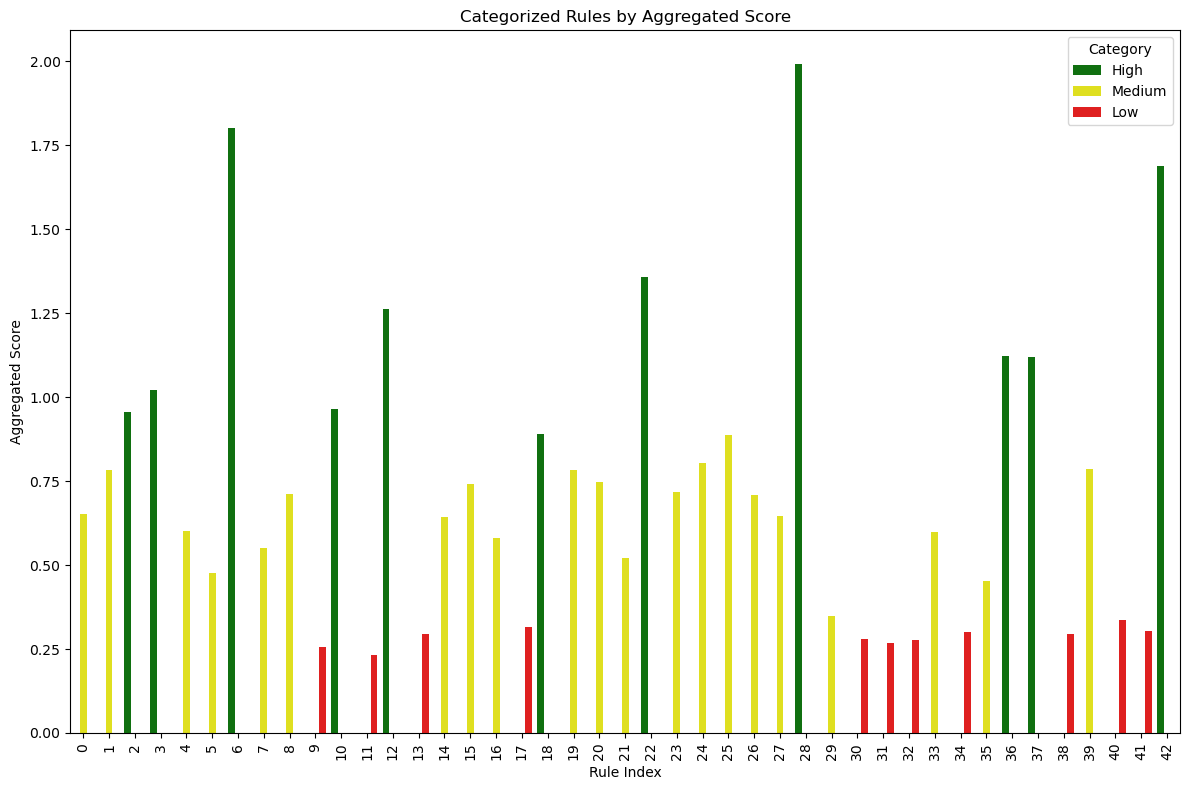

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
# Step 1: Define thresholds for categories
high_threshold = rule_metrics_df['Aggregated Score'].quantile(0.75)
low_threshold = rule_metrics_df['Aggregated Score'].quantile(0.25)

# Step 2: Create a new column for rule categories based on thresholds
rule_metrics_df['Category'] = rule_metrics_df['Aggregated Score'].apply(
    lambda x: 'High' if x > high_threshold else ('Low' if x < low_threshold else 'Medium')
)

# Step 3: Sort the DataFrame by Aggregated Score
rule_metrics_df_sorted = rule_metrics_df.sort_values(by='Aggregated Score', ascending=False)

# Step 4: Plot the categorized rules
plt.figure(figsize=(12, 8))

# Use seaborn to create a bar plot with different colors for different categories
sns.barplot(
    x=rule_metrics_df_sorted.index,
    y='Aggregated Score',
    hue='Category',
    data=rule_metrics_df_sorted,
    palette={'High': 'green', 'Medium': 'yellow', 'Low': 'red'}
)

plt.xlabel('Rule Index')
plt.ylabel('Aggregated Score')
plt.title('Categorized Rules by Aggregated Score')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

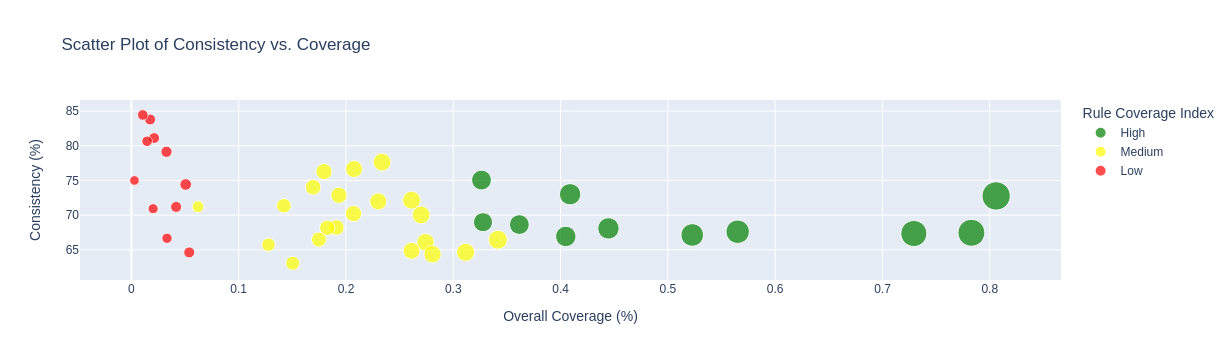

In [82]:
import plotly.express as px
import pandas as pd

# Assuming 'rule_metrics_df_sorted' is the DataFrame from earlier
fig = px.scatter(
    rule_metrics_df_sorted,
    x='Overall Coverage (%)',
    y='Consistency (%)',
    color='Category',  # Corrected column name
    size='Aggregated Score',
    hover_data=['Rule', 'Overall Coverage (%)', 'Consistency (%)', 'Relative Coverage (%)'],
    color_discrete_map={'High': 'green', 'Medium': 'yellow', 'Low': 'red'},
    title='Scatter Plot of Consistency vs. Coverage'
)

fig.update_layout(
    xaxis_title='Overall Coverage (%)',
    yaxis_title='Consistency (%)',
    legend_title='Rule Coverage Index'
)

fig.show()

In [72]:
# Check the unique values in the 'Rule' column to confirm the rule numbers
print(rule_metrics_df_sorted['Rule'].unique())


['Critical rule 0' 'Critical rule 2' 'Critical rule 1' 'Critical rule 13'
 'Critical rule 5' 'Critical rule 35' 'Critical rule 27'
 'Critical rule 19' 'Critical rule 11' 'Critical rule 17'
 'Critical rule 8' 'Critical rule 3' 'Critical rule 4' 'Critical rule 14'
 'Critical rule 26' 'Critical rule 18' 'Critical rule 16'
 'Critical rule 12' 'Critical rule 33' 'Critical rule 24'
 'Critical rule 10' 'Critical rule 7' 'Critical rule 34'
 'Critical rule 40' 'Critical rule 20' 'Critical rule 22'
 'Critical rule 21' 'Critical rule 6' 'Critical rule 28'
 'Critical rule 42' 'Critical rule 15' 'Critical rule 29'
 'Critical rule 38' 'Critical rule 9' 'Critical rule 30'
 'Critical rule 23' 'Critical rule 41' 'Critical rule 39'
 'Critical rule 31' 'Critical rule 32' 'Critical rule 36'
 'Critical rule 25' 'Critical rule 37']


In [78]:
rule_metrics_df_sorted

,Rule,Overall Coverage (%),Consistency (%),Relative Coverage (%),Aggregated Score,Category
28,Critical rule 0,0.805953,72.767075,8.849840,1.992299,Good
6,Critical rule 2,0.782899,67.457933,7.969471,1.800183,Good
42,Critical rule 1,0.729262,67.354839,7.412141,1.688139,Good
22,Critical rule 13,0.565061,67.610325,5.764998,1.358656,Good
12,Critical rule 5,0.522717,67.146715,5.296415,1.263337,Good
36,Critical rule 35,0.408857,73.014960,4.504792,1.122048,Good
37,Critical rule 27,0.444615,68.095238,4.568690,1.120247,Good
3,Critical rule 19,0.404858,66.937827,4.089457,1.020729,Good
10,Critical rule 11,0.326286,75.054074,3.695421,0.965878,Good
2,Critical rule 17,0.361573,68.640208,3.745119,0.956752,Good


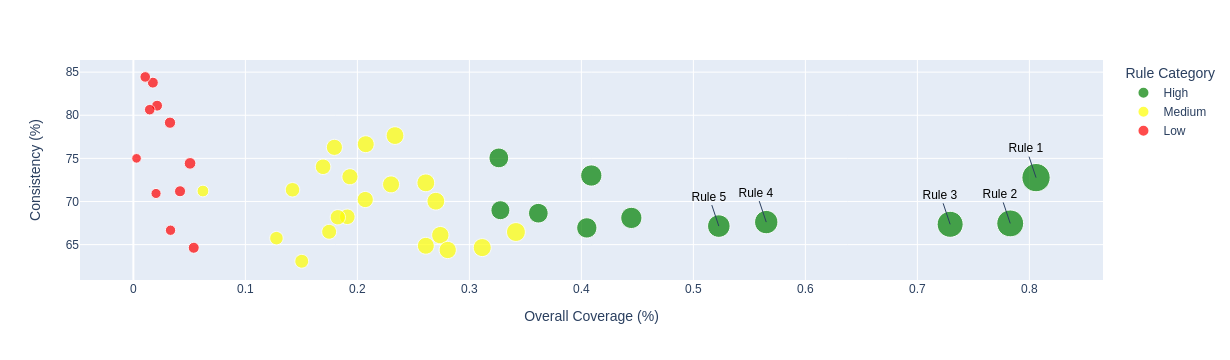

In [83]:
import plotly.express as px
import pandas as pd

# Assuming 'rule_metrics_df_sorted' is the DataFrame from earlier
fig = px.scatter(
    rule_metrics_df_sorted,
    x='Overall Coverage (%)',
    y='Consistency (%)',
    color='Category',  # Corrected column name
    size='Aggregated Score',
    hover_data=['Rule', 'Overall Coverage (%)', 'Consistency (%)', 'Relative Coverage (%)'],
    color_discrete_map={'High': 'green', 'Medium': 'yellow', 'Low': 'red'},
    #title='Scatter Plot of Consistency vs. Coverage'
)

fig.update_layout(
    xaxis_title='Overall Coverage (%)',
    yaxis_title='Consistency (%)',
    legend_title='Rule Category'
)

# Update annotations based on the exact rule names in the DataFrame
annotations = {
    'Critical rule 0': 'Rule 1',
    'Critical rule 2': 'Rule 2',
    'Critical rule 1': 'Rule 3',
    'Critical rule 13': 'Rule 4',
    'Critical rule 5': 'Rule 5'
}

for rule_name, annotation in annotations.items():
    # Get the row corresponding to the rule
    rule_row = rule_metrics_df_sorted[rule_metrics_df_sorted['Rule'] == rule_name].iloc[0]
    
    # Add annotation at the specific point
    fig.add_annotation(
        x=rule_row['Overall Coverage (%)'],
        y=rule_row['Consistency (%)'],
        text=annotation,
        #showarrow=True,
        #arrowhead=2,
        #ax=0,
        #ay=-20,
        font=dict(size=12, color="black")
    )

fig.show()



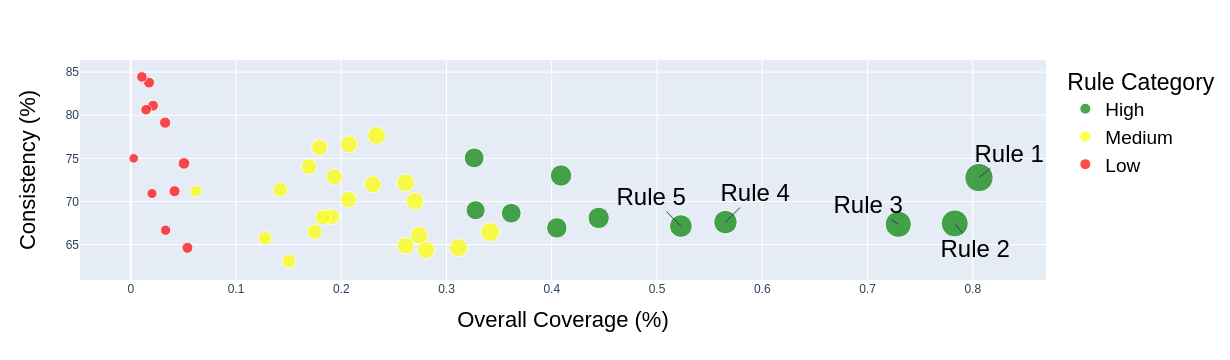

In [118]:
import plotly.express as px
import pandas as pd

# Assuming 'rule_metrics_df_sorted' is the DataFrame from earlier
fig = px.scatter(
    rule_metrics_df_sorted,
    x='Overall Coverage (%)',
    y='Consistency (%)',
    color='Category',  # Corrected column name
    size='Aggregated Score',
    hover_data=['Rule', 'Overall Coverage (%)', 'Consistency (%)', 'Relative Coverage (%)'],
    color_discrete_map={'High': 'green', 'Medium': 'yellow', 'Low': 'red'}
)

# Update axis labels to be darker and bigger
fig.update_layout(
    xaxis_title='Overall Coverage (%)',
    yaxis_title='Consistency (%)',
    xaxis=dict(title_font=dict(size=22, color='black')),  # Bigger and darker x-axis label
    yaxis=dict(title_font=dict(size=22, color='black')),  # Bigger and darker y-axis label
    legend_title='Rule Category',
    legend=dict(font=dict(size=19, color='black'))  # Bigger and darker legend text
)

# Define annotation offsets for overlapping points
annotation_offsets = {
    'Critical rule 0': (30, -25),  # Rule 1: Default position
    'Critical rule 2': (20, 25),  # Rule 2: Default position
    'Critical rule 1': (-30, -20),  # Rule 3: Default position
    'Critical rule 13': (30, -30),  # Rule 4: Move up-left
    'Critical rule 5': (-30, -30)  # Rule 5: Move down-right
}

# Update annotations
annotations = {
    'Critical rule 0': 'Rule 1',
    'Critical rule 2': 'Rule 2',
    'Critical rule 1': 'Rule 3',
    'Critical rule 13': 'Rule 4',
    'Critical rule 5': 'Rule 5'
}

for rule_name, annotation in annotations.items():
    # Get the row corresponding to the rule
    rule_row = rule_metrics_df_sorted[rule_metrics_df_sorted['Rule'] == rule_name].iloc[0]
    
    # Retrieve custom offsets
    ax_offset, ay_offset = annotation_offsets[rule_name]
    
    # Add annotation at the specific point
    fig.add_annotation(
        x=rule_row['Overall Coverage (%)'],
        y=rule_row['Consistency (%)'],
        text=annotation,
        #showarrow=True,
        #arrowhead=4,
        ax=ax_offset,  # Apply horizontal offset
        ay=ay_offset,  # Apply vertical offset
        font=dict(size=24, color="black")  # Bigger and darker annotations
    )

fig.show()


In [44]:
#Separate the rules into three different DataFrames for Good, Average, and Bad rules
good_rules_df = rule_metrics_df_sorted[rule_metrics_df_sorted['Category'] == 'Good']
average_rules_df = rule_metrics_df_sorted[rule_metrics_df_sorted['Category'] == 'Average']
bad_rules_df = rule_metrics_df_sorted[rule_metrics_df_sorted['Category'] == 'Bad']



In [45]:
print(len(good_rules_df))

11


In [46]:
good_rules_df

,Rule,Overall Coverage (%),Consistency (%),Relative Coverage (%),Aggregated Score,Category
28,Critical rule 0,0.805953,72.767075,8.849840,1.992299,Good
6,Critical rule 2,0.782899,67.457933,7.969471,1.800183,Good
42,Critical rule 1,0.729262,67.354839,7.412141,1.688139,Good
22,Critical rule 13,0.565061,67.610325,5.764998,1.358656,Good
12,Critical rule 5,0.522717,67.146715,5.296415,1.263337,Good
36,Critical rule 35,0.408857,73.014960,4.504792,1.122048,Good
37,Critical rule 27,0.444615,68.095238,4.568690,1.120247,Good
3,Critical rule 19,0.404858,66.937827,4.089457,1.020729,Good
10,Critical rule 11,0.326286,75.054074,3.695421,0.965878,Good
2,Critical rule 17,0.361573,68.640208,3.745119,0.956752,Good


## Sampling Methods Experiment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import (
    accuracy_score, roc_auc_score, f1_score, confusion_matrix,
    precision_recall_curve, roc_curve
)
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import BinaryCrossentropy

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek, SMOTEENN

# 📌 Selected Features
variable = [
    'triage_acuity_iter_numeric',
    'arrival_transport_encoded',
    'score_NEWS_numeric',
    'triage_sbp_iter_numeric',
    'med_event',
    'score_CART_numeric',
    'score_CCI_numeric',
    'n_icu_365d_numeric',
    'triage_heartrate_iter_numeric',
    'triage_resprate_iter_numeric',
    'age_numeric',
    'triage_dbp_iter_numeric',
    'triage_pain_iter_numeric',
    'score_NEWS2_numeric',
    'n_ed_365d_numeric'

]
# 📌 Define the Target Variable
target = "outcome_critical"

# 📌 Prepare Dataset
X = df_master[variable]
y = df_master[target]

# 📌 Split dataset into Training & Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 📌 Define Resampling Techniques
sampling_techniques = {
    'SMOTE': SMOTE(random_state=42),
    'ADASYN': ADASYN(random_state=42),
    'TomekLinks': TomekLinks(),
    'SMOTETomek': SMOTETomek(random_state=42),
    'SMOTEENN': SMOTEENN(random_state=42)
}

# 📌 Function to Create MLP Model
def create_mlp():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss=BinaryCrossentropy(), metrics=['AUC'])
    return model

# 📌 Initialize Classifiers
classifiers = {
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=100, random_state=42),
    'LogisticRegression': LogisticRegression(random_state=42),
}

# 📌 Stratified 5-Fold Cross-Validation
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# 📌 Store Results
results = {}

# 📌 Loop over Sampling Techniques
for technique_name, sampler in sampling_techniques.items():
    for classifier_name, classifier in {**classifiers, 'MLP': None}.items():  # Handle MLP separately
        accuracy_list, auc_list, specificity_list, sensitivity_list, f1_list = [], [], [], [], []

        for train_index, val_index in skf.split(X_train, y_train):
            # 📌 Split the data into Training & Validation sets
            X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
            y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

            # 📌 Apply Resampling to Training Data
            X_train_resampled, y_train_resampled = sampler.fit_resample(X_train_fold, y_train_fold)

            # 📌 Train Model
            if classifier_name == 'MLP':
                classifier = create_mlp()  # Reinitialize MLP for each fold
                classifier.fit(X_train_resampled, y_train_resampled, batch_size=200, epochs=20, verbose=0)
            else:
                classifier.fit(X_train_resampled, y_train_resampled)

            # 📌 Predictions
            if classifier_name == 'MLP':
                y_val_pred = (classifier.predict(X_val_fold) > 0.5).astype(int)
                y_val_pred_prob = classifier.predict(X_val_fold)
            else:
                y_val_pred = classifier.predict(X_val_fold)
                y_val_pred_prob = classifier.predict_proba(X_val_fold)[:, 1]

            # 📌 Compute Metrics
            accuracy = accuracy_score(y_val_fold, y_val_pred)
            auc_score = roc_auc_score(y_val_fold, y_val_pred_prob)
            tn, fp, fn, tp = confusion_matrix(y_val_fold, y_val_pred).ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            f1 = f1_score(y_val_fold, y_val_pred)

            # 📌 Store Metrics
            accuracy_list.append(accuracy)
            auc_list.append(auc_score)
            specificity_list.append(specificity)
            sensitivity_list.append(sensitivity)
            f1_list.append(f1)

        # 📌 Average Results
        results[f"{technique_name}_{classifier_name}"] = {
            'Accuracy': (np.mean(accuracy_list), np.std(accuracy_list)),
            'AUC': (np.mean(auc_list), np.std(auc_list)),
            'Specificity': (np.mean(specificity_list), np.std(specificity_list)),
            'Sensitivity': (np.mean(sensitivity_list), np.std(sensitivity_list)),
            'F1 Score': (np.mean(f1_list), np.std(f1_list))
        }

# 📌 Convert Results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

# 📌 Plot Confusion Matrices for Test Set
fig, axes = plt.subplots(len(sampling_techniques), len(classifiers) + 1, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, (technique_name, sampler) in enumerate(sampling_techniques.items()):
    for j, (classifier_name, classifier) in enumerate({**classifiers, 'MLP': None}.items()):
        # 📌 Apply Sampling to Training Data
        X_train_resampled, y_train_resampled = sampler.fit_resample(X_train, y_train)

        # 📌 Train Model
        if classifier_name == 'MLP':
            classifier = create_mlp()
            classifier.fit(X_train_resampled, y_train_resampled, batch_size=200, epochs=20, verbose=0)
        else:
            classifier.fit(X_train_resampled, y_train_resampled)

        # 📌 Predict on Test Set
        y_test_pred = (classifier.predict(X_test) > 0.5).astype(int) if classifier_name == 'MLP' else classifier.predict(X_test)

        # 📌 Confusion Matrix
        cm = confusion_matrix(y_test, y_test_pred)
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[i, j])
        axes[i, j].set_title(f"{technique_name} + {classifier_name}")

# 📌 Save & Show Plot
plt.subplots_adjust(top=0.95)
plt.savefig('confusion_matrices_percentage_all_new_15.png')
plt.show()

/home/cstylianides/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744371560.948226  676228 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744371560.987999  676228 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1744371560.991310  676228 cuda_executor